# Import and definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

import functions_simulation as sim
import functions_plotting as pp
snscolors=sns.color_palette() 

# Parameters and settings

In [2]:
tau_patch_values=[1.5,5]
Ttravelvalues=[1,5,10]
Evalues=[0.5,2,5]

# choose a certain case for these plots.  Note that some parts of the code below are not generalized to do other values
Enum=1
tpnum=1
Ttrnum=1
Evalue=Evalues[Enum]
tau_patch=tau_patch_values[tpnum]
Ttravel=Ttravelvalues[Ttrnum]
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
alphasize=sim.alpha_opt(Evalue,rho0,tau_patch)/rho0

# Run simulations that will be used for plotting

In [3]:
sigmarhovalues=[0.3,0,0]
sigmatauPvalues=[0,0,0.3]
cvalues=[0,8,0]
Ttrsigmavalues=[0,1,0]
numenvs=3  # set this to 2 to make the figure in the main text.  Set to 3 and then shorten the loop to make the supplemental figure

totaltime=10000
sigmavalue = 0.3 # noise, used for all

alphachoicevalues=[1,-0.2,1.05*alphasize]
numstrategies = len(alphachoicevalues)

def makeblanklists():
    return [[[] for _ in range(numstrategies)] for _ in range(numenvs)]

grid_rho0 = makeblanklists()
grid_prts = makeblanklists()
grid_taupatch = makeblanklists()
grid_numfood = makeblanklists()
grid_traveltimes = makeblanklists()
grid_Eresults = makeblanklists()
grid_Tresults = makeblanklists()

for env in range(numenvs):
    print('env ',env)
    sigmarho = sigmarhovalues[env]
    sigmatauP = sigmatauPvalues[env]
    cvalue = cvalues[env]
    Ttrsigma = Ttrsigmavalues[env]

    for anum in range(numstrategies):
        alphachoice = alphachoicevalues[anum]
        Eresults, Tresults, prts, traveltimes, allrho0, alltaupatch, numfoodrewards = sim.modelsimulation(totaltime=totaltime, dt=sim.dt, # time in seconds
                            tau_E=sim.tau_E, Ttravel=Ttravel, rho0=rho0, tau_patch=tau_patch, 
                            beta=0, sigma=sigmavalue*rho0, sigma_rho0=sigmarho*rho0, sigma_taupatch=sigmatauP*tau_patch, 
                            sigma_Ttravel=Ttrsigma,
                            q=cvalue,
                            alphachoice=alphachoice)
        grid_Eresults[env][anum] = Eresults
        grid_Tresults[env][anum] = Tresults
        grid_prts[env][anum] = prts
        grid_traveltimes[env][anum] = traveltimes
        grid_rho0[env][anum] = allrho0
        grid_taupatch[env][anum] = alltaupatch
        grid_numfood[env][anum] = numfoodrewards
        




env  0
env  1
env  2


# Main part of Figure 4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


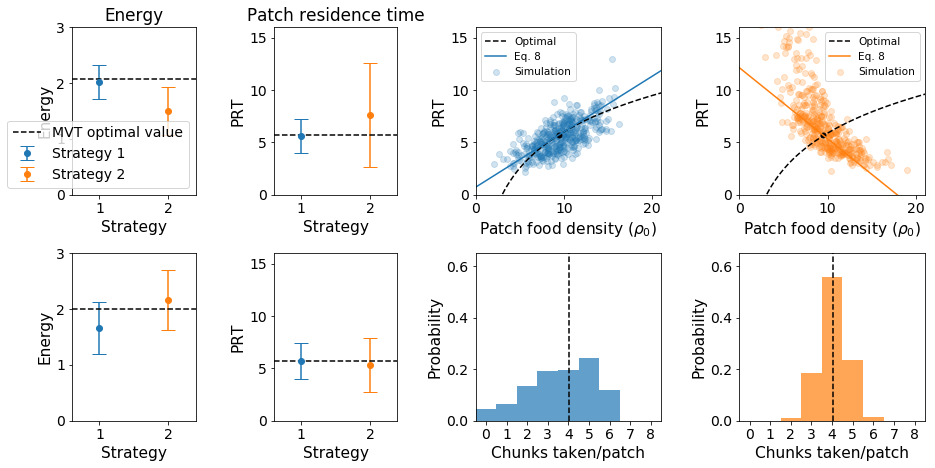

In [4]:
# make these arrays, and correct the optimal energy for the first environment  
grid_Eresults = np.array(grid_Eresults)
grid_Tresults = np.array(grid_Tresults)        
        

wratio = 1.5
gs_kw = dict(width_ratios=[1,1,wratio,wratio])
f,ax=plt.subplots(2,4,gridspec_kw=gs_kw)
f.set_size_inches((13,6.6))

envnames = np.arange(numenvs) + 1
lsize=14
s=sim.s  # this is needed for a few calculations below

for env in range(2):
    # Energy plot
    a=ax[env,0]
    for anum in range(2):
        a.errorbar(envnames[anum], grid_Eresults[env,anum,1], yerr=grid_Eresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
    if env==0:
        Eopt = 2.07689208  # manually entered value, from solution
    else:
        Eopt = 2      
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[1]+ew]
    a.plot(xopt,[Eopt,Eopt],'k--',label="MVT optimal value")
    
    a.set_xlim(xopt)
    a.set_ylim([0,3])
    a.set_xticks(envnames[0:2])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('Energy',fontsize=lsize*1.1)
    if env==0:
        a.legend(fontsize=lsize,loc=4)
        
    # Time of patch residence plot
    a=ax[env,1]
    for anum in range (2):
        a.errorbar(envnames[anum], grid_Tresults[env,anum,1], yerr=grid_Tresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[1]+ew]
    Topt = grid_Tresults[env,0,0]  # this the same for all
    a.plot(xopt,[Topt,Topt],'k--',label="MVT optimal")
    
    a.set_xlim(xopt)
    a.set_ylim([0,16])
    a.set_xticks(envnames[0:2])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)

[[a.set_xlabel('Strategy',fontsize=lsize*1.1) for a in ax[r,:]] for r in range(2)]
ax[0,0].set_title('Energy',fontsize=lsize*1.2)
ax[0,1].set_title('Patch residence time',fontsize=lsize*1.2)


env=0
Topt = grid_Tresults[env,0,0]
for anum in range(2):
    a = ax[env,anum+2]

    # opt
    rho=np.arange(0.001,22,0.1)    
    a.plot(rho,tau_patch*np.log(rho/(Eopt+s)),'k--',label="Optimal")
    
    # model calculation
    alpha = alphachoicevalues[anum]*rho0
   
    numpoints=425
    a.scatter(grid_rho0[env][anum][-numpoints:],grid_prts[env][anum][-numpoints:],c=snscolors[anum],alpha=0.2,label="Simulation")#,rasterized=True)
    
    Eopt = 2.07689208  # value taken from the solution
    model_dT = tau_patch*(Eopt+s-rho0)/( rho0*(Eopt+s-alpha)) * (rho-rho0)
    a.plot(rho,Topt+model_dT,c=snscolors[anum],label="Eq. 8") 
    
    Topt = grid_Tresults[env,0,0]
    a.scatter([rho0],[Topt],marker='o',s=25,color='k')#,label='$\\rho_0$')
    
    # format and labels    
    a.set_ylim([0,16])
    a.set_xlim([0,21])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)
    a.set_xlabel('Patch food density ($\\rho_0$)',fontsize=1.1*lsize)
    a.legend(fontsize=lsize*0.75)


env=1
Topt = grid_Tresults[env,0,0]
optnumfood = - sim.eta_opt(E=2,rho0=rho0,tau_patch=tau_patch,alpha=0)/cvalues[env]
for anum in range(2):
    a = ax[env,anum+2]
    a.hist(grid_numfood[env][anum],bins=np.arange(0,10)-0.5,density=True,color=snscolors[anum],alpha=0.7)
    # opt
    a.plot([optnumfood,optnumfood],[0,1],'k--')
    # format and labels
    a.set_ylim([0,0.65])
    a.set_xlim([-0.5,8.5])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('Probability',fontsize=lsize*1.1)    
    a.set_xlabel('Chunks taken/patch',fontsize=1.1*lsize)    
    a.set_xticks(np.arange(0,9))
        
plt.subplots_adjust(wspace=0.15,hspace=0.5)
f.tight_layout()
#plt.savefig('fig3-strategies-correlation-only2.pdf')
plt.show()    

# Illustrate the distributions used for each

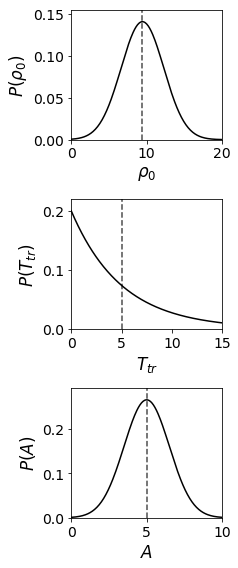

In [5]:

f,ax = plt.subplots(3,1)
f.set_size_inches((3.5,8))

# env 1:  patch density
env=0
rho=np.arange(0,20.1,0.1)
sigmarho = sigmarhovalues[env]*rho0
norm = 1/np.sqrt(2*np.pi*sigmarho**2)
norm = 1/7.09466  # these two are really close together, but I'm using this (which I evaluated in Mathematica), because its technically correct
ax[env].plot(rho,norm * np.exp(-(rho0-rho)**2/(2*sigmarho**2)),c='k')
maxy=1.1*norm
ax[env].plot([rho0,rho0],[0,maxy],'k--',alpha=0.7)
ax[env].set_xlim([0,20])
ax[env].set_ylim(bottom=0)
ax[env].set_ylim(bottom=0)
ax[env].set_ylim(top=maxy)

# env 2:  travel times
env=1
tt = np.arange(0,15.05,0.05)
ax[env].plot(tt, 1/Ttravel * np.exp(-tt/Ttravel),c='k')
ax[env].plot([Ttravel,Ttravel],[0,1.1],'k--',alpha=0.7)
ax[env].set_xlim([0,15])
ax[env].set_ylim(bottom=0)
ax[env].set_ylim(top=0.22)

# env 3:  patch size
env=2
tp=np.arange(0,10.05,0.05)
sigmatp = sigmatauPvalues[env]*tau_patch
norm = 1/np.sqrt(2*np.pi*sigmatp**2)
norm = 1/3.75833
ax[env].plot(tp,norm * np.exp(-(tau_patch-tp)**2/(2*sigmatp**2)),c='k')
maxy=1.1*norm
ax[env].plot([tau_patch,tau_patch],[0,maxy],'k--',alpha=0.7)
ax[env].set_xlim([0,10])
ax[env].set_ylim(bottom=0)
ax[env].set_ylim(top=maxy)



# adjust some formatting
[a.tick_params(labelsize=lsize) for a in ax]
ax[0].set_yticks([0,0.05,0.1,0.15])
ax[0].set_ylabel('$P(\\rho_0)$',fontsize=lsize*1.2)
ax[0].set_xlabel('$\\rho_0$',fontsize=lsize*1.2)
ax[1].set_ylabel('$P(T_{tr})$',fontsize=lsize*1.2)
ax[1].set_xlabel('$T_{tr}$',fontsize=lsize*1.2)
ax[2].set_ylabel('$P(A)$',fontsize=lsize*1.2)
ax[2].set_xlabel('$A$',fontsize=lsize*1.2)


plt.subplots_adjust(wspace=0.15,hspace=1)
f.tight_layout()
#plt.savefig('fig3-distributions.pdf')
plt.show()    


# Supplemental figure S3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


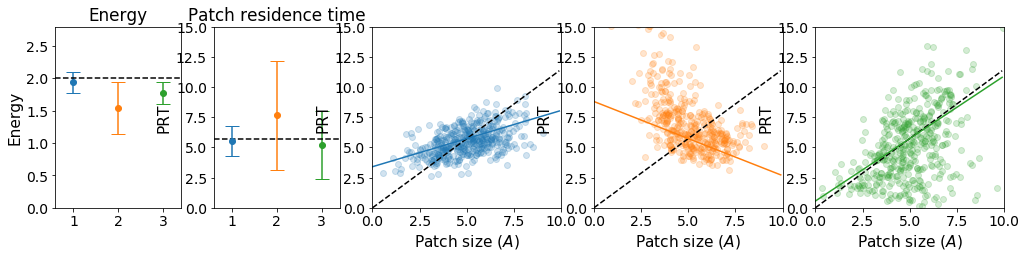

In [6]:

wratio = 1.5
gs_kw = dict(width_ratios=[1,1,wratio,wratio,wratio])
f,ax=plt.subplots(1,5,gridspec_kw=gs_kw)
f.set_size_inches((17,10/3))

envnames = np.arange(numenvs) + 1
lsize=14
s=1  # this is needed for a few calculations below


for env in [2]:
    # Energy plot
    a=ax[0]
    for anum in range (numstrategies):
        a.errorbar(envnames[anum], grid_Eresults[env,anum,1], yerr=grid_Eresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
#    a.scatter(envnames,grid_Eresults[env,:,3],label='Eactual',c='r')
    if env==0:
        Eopt = 2.07689208
    else:
        Eopt = 2      
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[-1]+ew]
    a.plot(xopt,[Eopt,Eopt],'k--',label="MVT optimal value")
    
    a.set_xlim(xopt)
    a.set_ylim([0,2.8])
    a.set_xticks(envnames)
    a.tick_params(labelsize=lsize)
    a.set_ylabel('Energy',fontsize=lsize*1.1)
    if env==0:
        a.legend(fontsize=lsize,loc=4)
        
    # Time of patch residenc plot
    a=ax[1]
    for anum in range (numstrategies):
        a.errorbar(envnames[anum], grid_Tresults[env,anum,1], yerr=grid_Tresults[env,anum,2], fmt='o', capsize=7,c=snscolors[anum],label='Strategy '+str(anum+1))
    ew = 0.4
    xopt = [envnames[0]-ew, envnames[-1]+ew]
    Topt = grid_Tresults[env,0,0]  # this the same for all
    a.plot(xopt,[Topt,Topt],'k--',label="MVT optimal")
    
    a.set_xlim(xopt)
    a.set_ylim([0,15])
    a.set_xticks(envnames)
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)

ax[0].set_title('Energy',fontsize=lsize*1.2)
ax[1].set_title('Patch residence time',fontsize=lsize*1.2)


env=2
Topt = grid_Tresults[env,0,0]
for anum in range(numstrategies):
    a = ax[anum+2]
    numpoints=425
    a.scatter(grid_taupatch[env][anum][-numpoints:],grid_prts[env][anum][-numpoints:],c=snscolors[anum],alpha=0.2)

    # opt
    tp=np.arange(0,10,0.1)
    a.plot(tp,tp*np.log(rho0/(Eopt+1)),'k--')  # optimal

    # model calculation
    alpha = alphachoicevalues[anum]*rho0
    Eopt = 2      
    es = Eopt+s
    model_dT = ((Eopt+s)*(1+np.log(rho0/(Eopt+s)))-rho0)/(Eopt+s-alpha) * (tp-tau_patch)
    a.plot(tp,Topt+model_dT,c=snscolors[anum])    
    
    # format and labels
    a.set_ylim([0,15])
    a.set_xlim([0,10])
    a.tick_params(labelsize=lsize)
    a.set_ylabel('PRT',fontsize=lsize*1.1)    
    a.set_xlabel('Patch size ($A$)',fontsize=1.1*lsize)
    
plt.show()